# Course Project: Backtest System Demo

Jiacheng XIE, #2300921938

## Setup

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install yfinance
%pip install pyarrow

## Run System

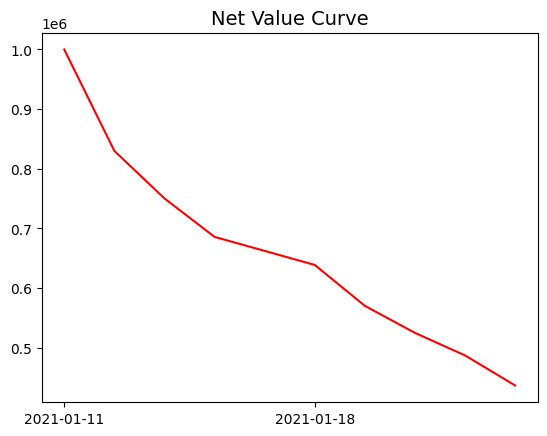

[*********************100%%**********************]  1 of 1 completed


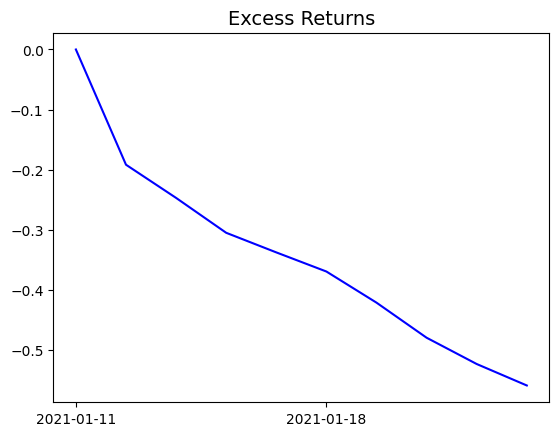

Annualized return is -1.0
Annualized volatility is 2.6975239817284296
Sharpe ratio is -3.3281784391552534
Maximum drawdown is 0.5633096399398697


In [1]:
from mysystem.data import data
from mysystem.portfolio import portfolio
from mysystem.history import history
from mysystem.strategy import strategy
from mysystem.after_trade import after_trade
from mysystem.output import output

if __name__ == '__main__':
    # import data
    path = '../data/stk_daily.feather'
    data_all = data.get_data_all(path)

    # initialize the account
    start_date = '2021-01-11'
    end_date = '2021-01-22'
    commission = 0.0005
    
    cash = 1000000

    date_all = data.get_date_all(data_all, start_date, end_date)
    buy_list = data.generate_buy_list(data_all, start_date, end_date)

    # create system objects
    my_history = history()
    my_data = data(data_all, date_all)
    my_account = portfolio(cash, start_date, commission, my_history, my_data)
    my_review = after_trade(my_account, my_history, start_date, cash, my_data)
    my_output = output(my_history)
    my_strategy = strategy(my_data, my_account, buy_list, start_date)

    # do backtesting
    for date in date_all:
        # strategy here
        my_strategy.five_days_reverse(date)
        my_review.after_trade(date)

    my_output.plot_output()
    my_output.save_order_history()
    my_output.save_hold_history()